# NP Predictive Analytics Assignment - EDA of Dataset
We conduct Exploratory Data Analysis (EDA) on the Math dataset in an attempt to gain helpful insights in the dataset.

## Background 
Background Inforamation on the dataset can be gathered the dataset's compliementary [research paper](http://www3.dsi.uminho.pt/pcortez/student.pdf):
- The dataset tracks secondary school students performance in two subjects, Mathematics and Portugese, with the data stored in `Math.csv` and `Por.csv` CSV respectively.
- The dataset collects data from the 2005-2006 school year, comprising of 395 examples for Mathematics and 649 examples for Portugese.
- In Portgual Grades are scored on a 0-20 scale, 0 being the lowest and 20 being perfect grade.

The features in the dataset is also described in the research paper:

| Feature | Description |
| --- | --- |
| sex | student’s sex (binary: female or male) |
| age | student’s age (numeric: from 15 to 22) |
| school | student’s school (binary: Gabriel Pereira or Mousinho da Silveira) |
| address |  student’s home address type (binary: U - urban or R -rural) |
| Pstatus |  parent’s cohabitation status (binary: living together or apart) |
| Medu | mother’s education (numeric: from 0 to 4 a ) |
| Mjob | mother’s job (nominal b ) |
| Fedu | father’s education (numeric: from 0 to 4 a ) |
| Fjob | father’s job (nominal b ) |
| guardian | student’s guardian (nominal: mother, father or other) |
| famsize | family size (binary: ≤ 3 or > 3) |
| famrel | quality of family relationships (numeric: from 1 – very bad to 5 – excellent) |
| reason | reason to choose this school (nominal: close to home, school reputation, course preference or other) |
| traveltime |  home to school travel time (numeric: 1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4– > 1 hour). |
| studytime | weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours or 4 – > 10 hours) |
| failures | number of past class failures (numeric: n if 1 ≤ n < 3, else 4) |
| schoolsup | extra educational school support (binary: yes or no) |
| famsup | family educational support (binary: yes or no) |
| activities | extra-curricular activities (binary: yes or no) |
| paid |  extra paid classes (binary: yes or no) |
| internet | Internet access at home (binary: yes or no) |
| nursery |  attended nursery school (binary: yes or no) |
| higher | wants to take higher education (binary: yes or no) |
| romantic | with a romantic relationship (binary: yes or no) |
| freetime | free time after school (numeric: from 1 – very low to 5 – very high) |
| goout | going out with friends (numeric: from 1 – very low to 5 – very high) |
| Walc | weekend alcohol consumption (numeric: from 1 – very low to 5 – very high) |
| Dalc | workday alcohol consumption (numeric: from 1 – very low to 5 – very high) |
| health | current health status (numeric: from 1 – very bad to 5 – very good) |
| absences | number of school absences (numeric: from 0 to 93) |
| G1 | first period grade (numeric: from 0 to 20) |
| G2 | second period grade (numeric: from 0 to 20) |
| G3 |  final grade (numeric: from 0 to 20) |

## Objective
As outlined in the assignment document, the target output variable for prediction is final grade (`G3`).

However, the assignment also requires us to treat the target output variable as both categorical and numeric
as we are required to train both classification and regression models

# Setup & Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy.polynomial.polynomial import polyfit
sns.set(style="whitegrid")

from data import dataset, dataprep

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load Data
Use `pandas` to load the dataset

In [2]:
# ensure dtypes are correct on read so that we would not have
# to correct the dtypes later
col_dtypes = { col: "category" for col in dataset.cat_features + dataset.bin_features}

# read dataset csv
math_df = pd.read_csv(os.path.join("data", "Math.csv"), dtype=col_dtypes)
por_df = pd.read_csv(os.path.join("data", "Por.csv"), dtype=col_dtypes)
print(f"loaded math examples: {len(math_df)}, portugese examples: {len(por_df)}")

loaded math examples: 395, portugese examples: 649


Merge the CSVs to simplify EDA:

In [3]:
math_df["subject"] = "math"
por_df["subject"] = "portugese"

df = math_df.append(por_df)

## Explore Data
Conduct EDA on the dataset to gain insights on the data

### Missing Values
Check for missing values in the dataset 

In [4]:
df.isna().any().any()

False

## Numeric Features

### Statistical Methods

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


###  Histograms
Use histograms to explore numeric features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25902c6a10>,
      dtype=object)

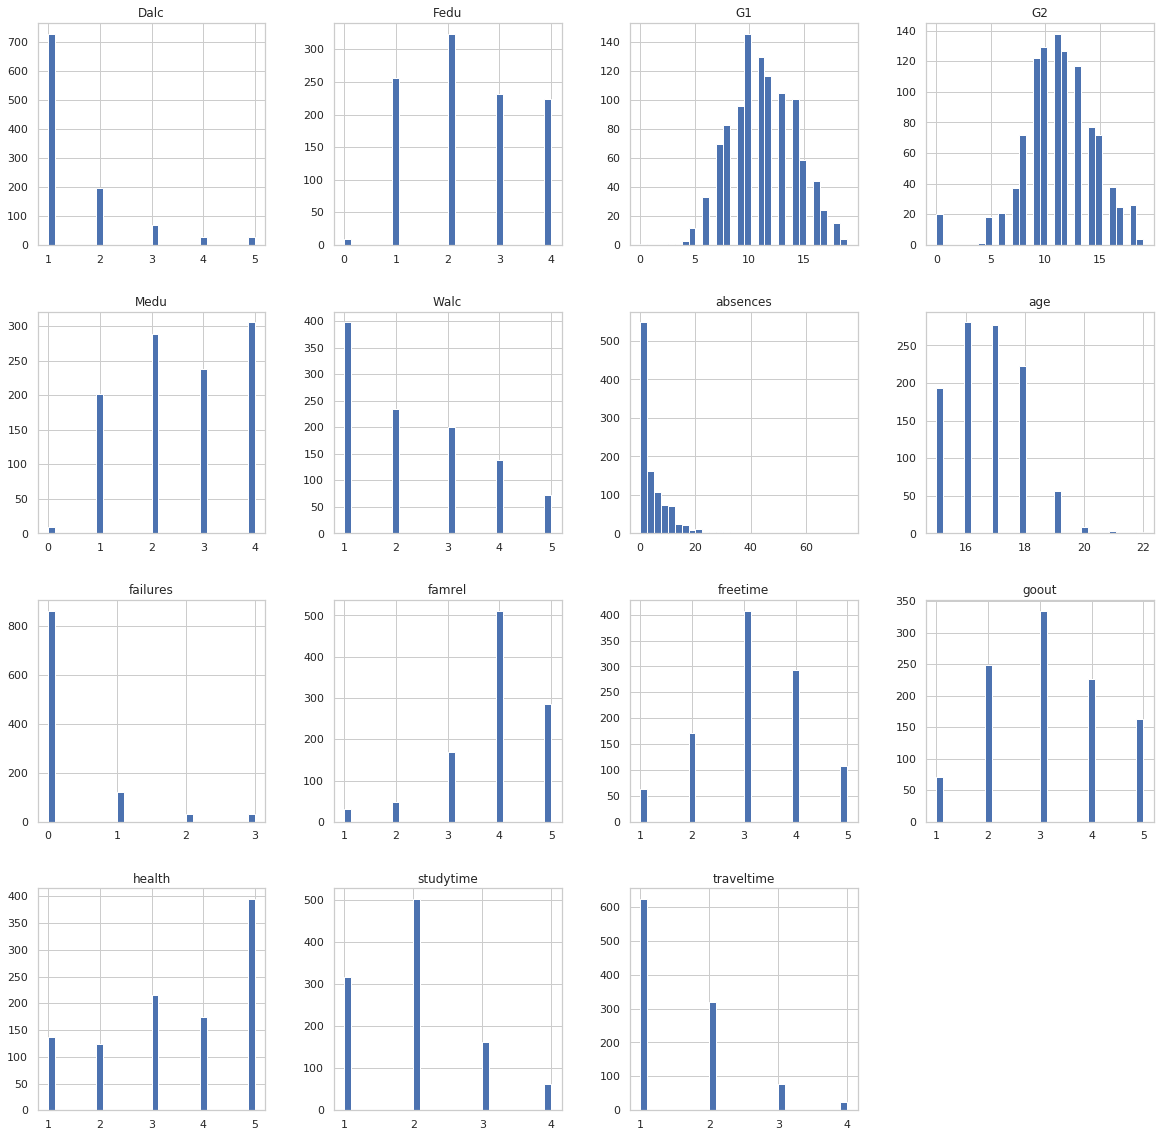

In [6]:
df[dataset.num_features].hist(bins=30, figsize=(20, 20))

Observations:
- `absences` is power law distributed & skewed. A `log()` transform could be applied to correct the skew.

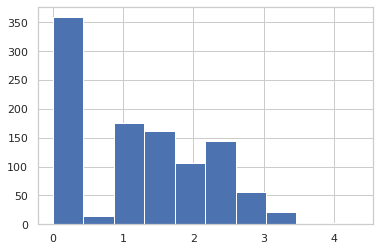

In [7]:
df["logAbsences"] = np.log1p(df["absences"])
df["logAbsences"].hist()

## Scatterplot
Scatterplot features against the target variable to find relationships
- overlay scatterplots with a linear regression line to show linear relationships

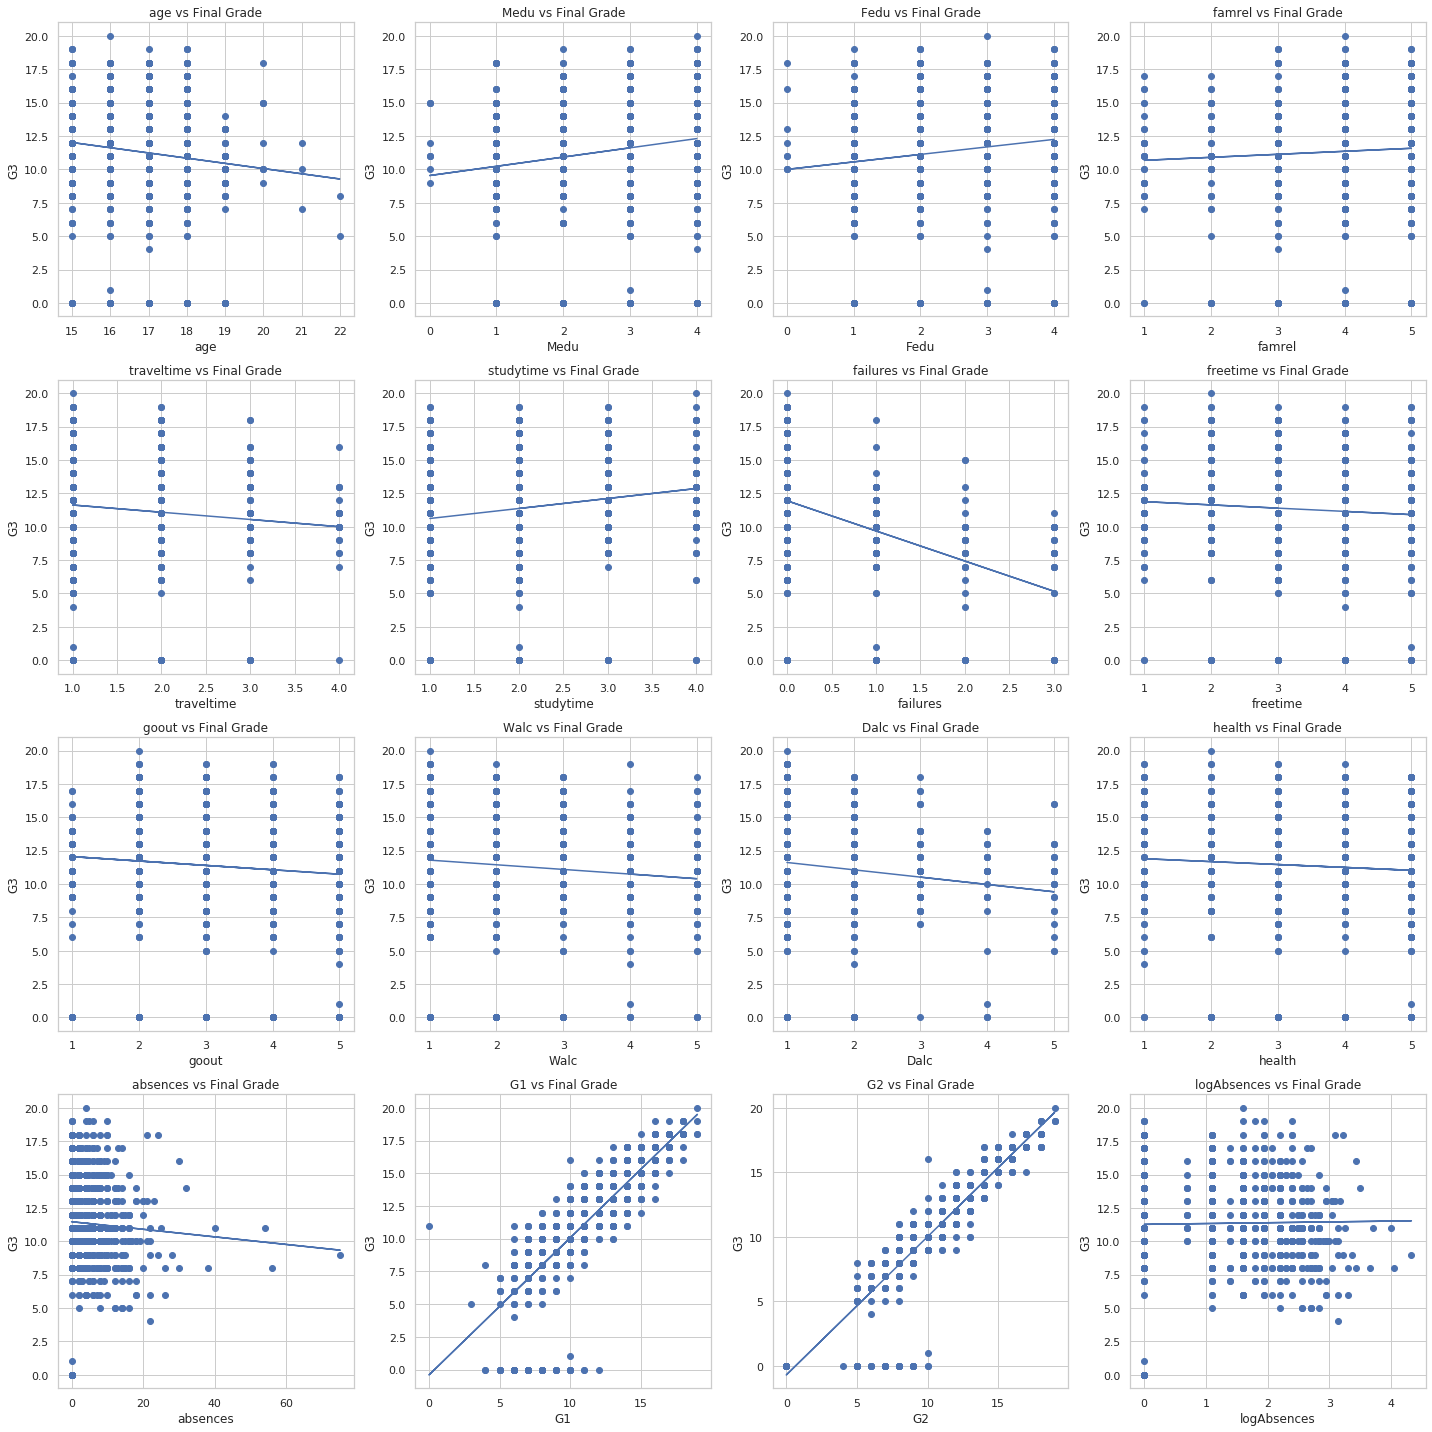

In [18]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for feature, ax in zip(dataprep.num_features, axs.ravel()):
    # set plot labels
    ax.set_title(f"{feature} vs Final Grade")
    ax.set_xlabel(feature)
    ax.set_ylabel(dataset.target_var)

    # scatterplot data
    print()
    ax.scatter(df[feature], df[dataset.target_var])
    
    # plot a linear regression line to visualise linear trends
    b, m = polyfit(df[feature], df[dataset.target_var], 1)
    line = m * df[feature] + b
    ax.plot(df[feature], line)
    
fig.tight_layout()

Observations:
- `G1` & `G2` are very strongly correlated with the final grade `G3`
- failures are negatively correlated with the final grade `G3`
- age is negatively correlated with final grade `G3`
- `logAbsences` seems to be positive correlated with final grade `G3`. This may be because the relationship between `logAbsences` and final grade is nonlinear.

### Correlations
Compute pearson correlations against final grade

<BarContainer object of 16 artists>

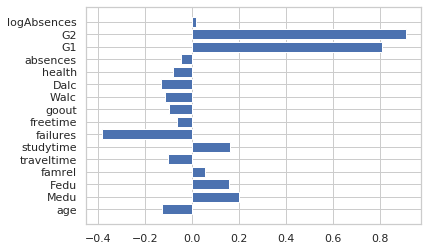

In [9]:
correlations = df[dataprep.num_features].corrwith(df["G3"])
plt.barh(dataprep.num_features, correlations)

Observations:
- as before, `G1` & `G2` are very strongly correlated with the final grade `G3`
- as before, failures are negatively correlated with the final grade `G3`
- `studytime`, `Fedu`, `Medu`are somewhat postively correlegated with `G3`
- `Dalc` & `Walc` measuring alchol consumption is unsuprisingly negatively correlated with final grade `G3`

## Categorical Features

### Boxplots
Boxplot to visualise final grade `G3` as affected by each categorical feature

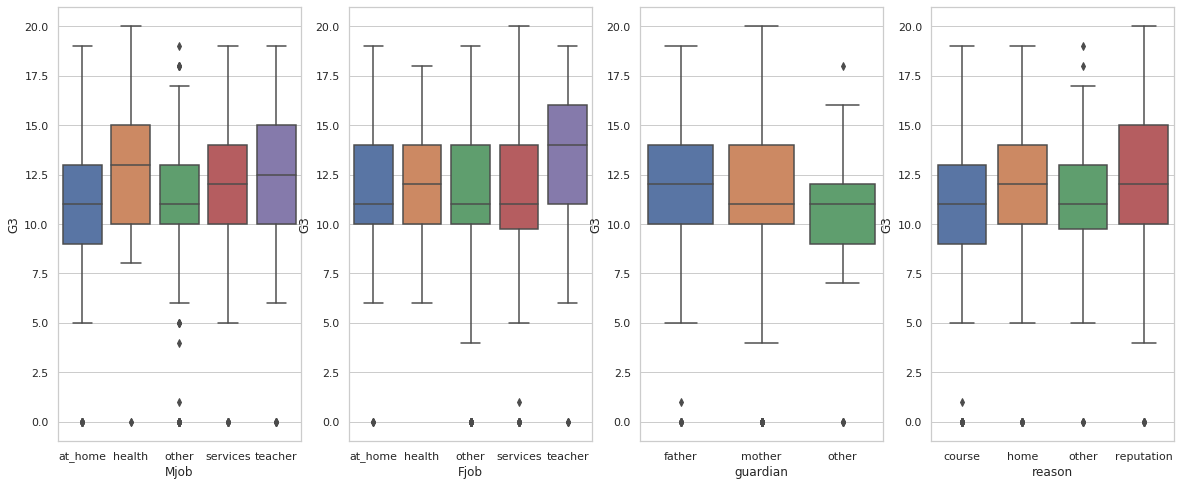

In [10]:
f, axs = plt.subplots(1, 4, figsize=(20, 8))
for feature, ax in zip(dataset.cat_features, axs.ravel()):
    sns.boxplot(x=feature, y="G3", data=df, ax=ax)

Observations:
- Mothers with are healthcare workers and teachers are correlated with students with higher `G3` scores
- Fathers that are teachers are correlated with students with higher `G3` scores
- Students with their father as their guardian are correlated to have higher final scores `G3`
- Students that choose their school based on proximity to house and reputatatios score higher than other reasonss

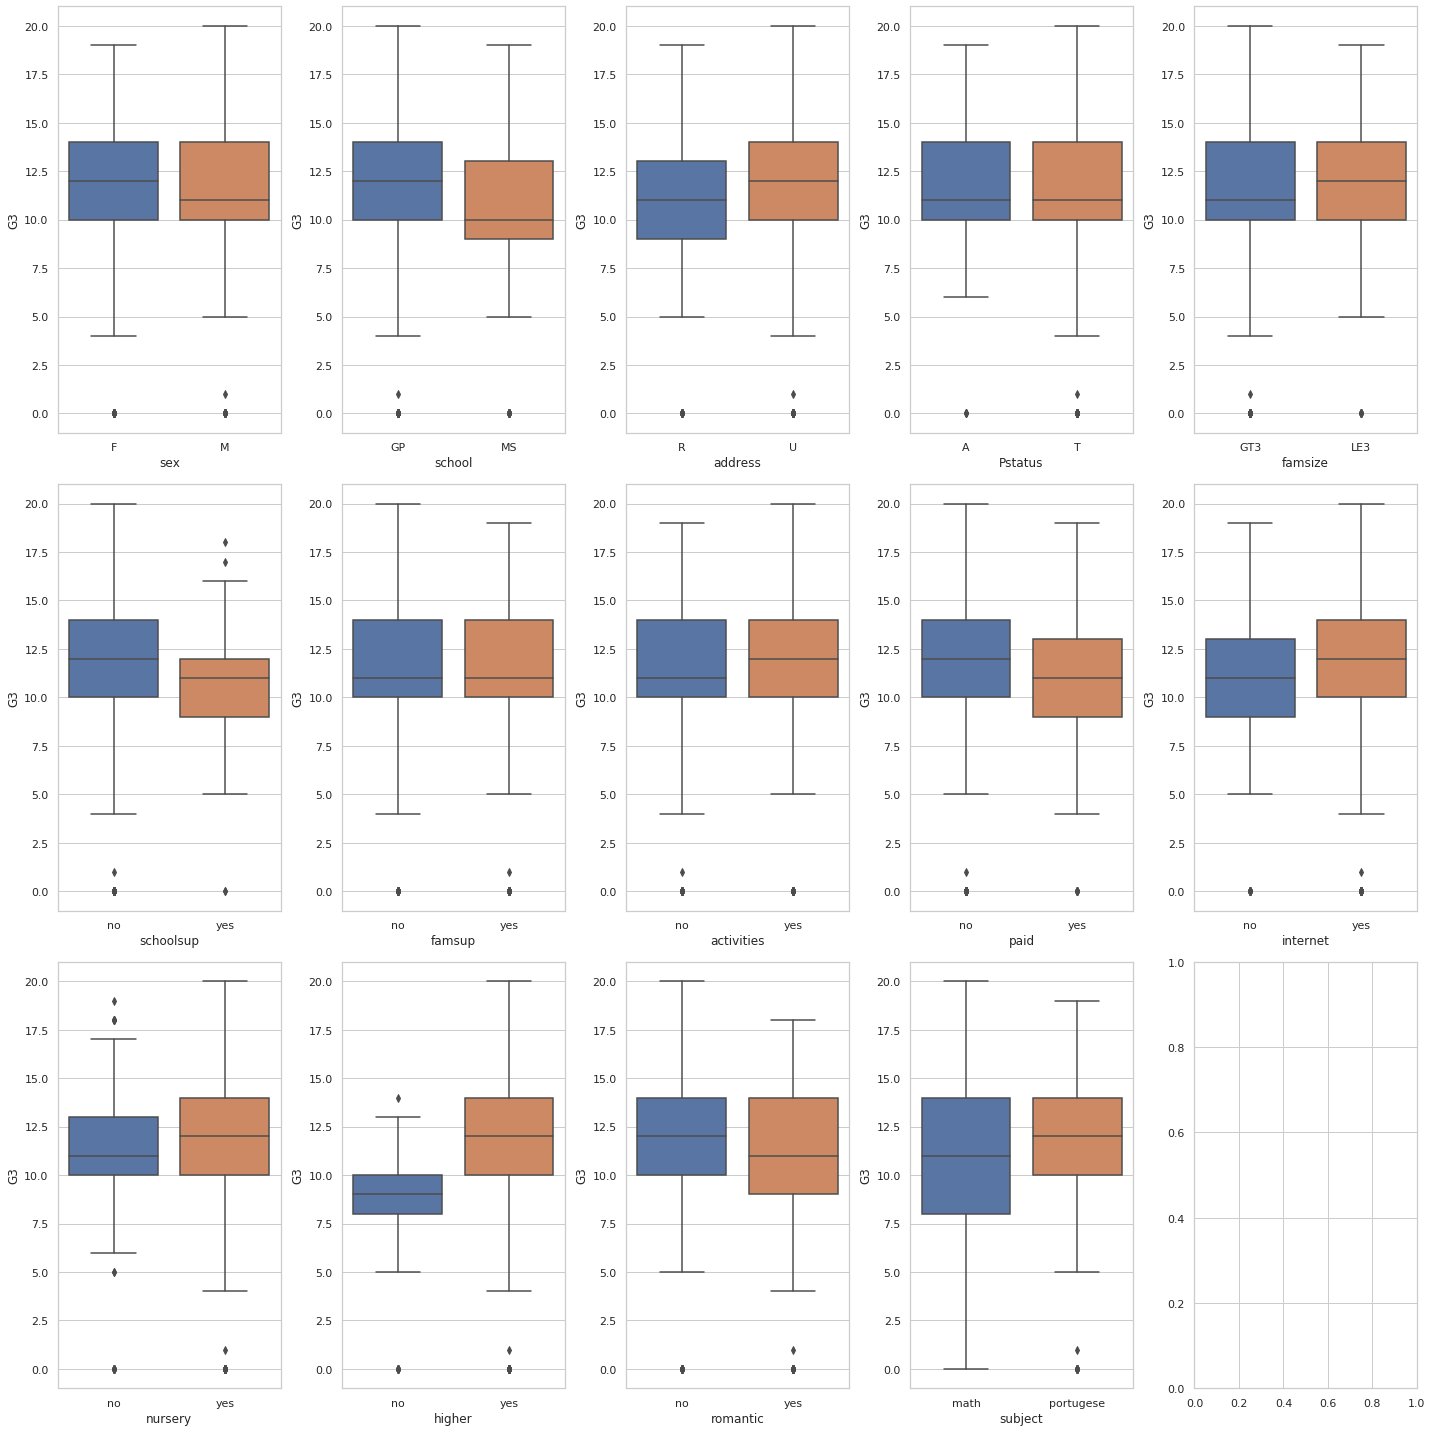

In [11]:
f, axs = plt.subplots(3, 5, figsize=(20, 20))
for feature, ax in zip(dataprep.bin_features, axs.ravel()):
    sns.boxplot(x=feature, y="G3", data=df, ax=ax)
plt.tight_layout()

- Students that have ambiditions for `higher`  education is strongly correlated higher final score `G3`
- Students with `paid` tuition, not in school support programs, `schoolsup`, not in `romantic` relationships is correlated with a higher final score `G3` and live in urban `address` 

## Target Output Variable
Analysis of the distribution of the final target output variable:

### As a Numeric Variable
Visualise the distribution of students along final grade `G3`:

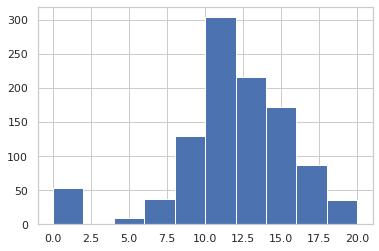

In [12]:
df[dataset.target_var].hist()

### As a Categorical Variable
Visualise the distribution of students along final grade `G3`:

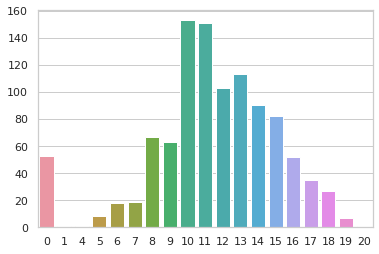

In [13]:
counts = df[dataset.target_var].value_counts()
sns.barplot(counts.index, counts.values)

Observations:
- The distribution of the target `G3` is extremely imbalanced. Classes `10`,`11` have many training examples while classes `1,4,20` have only 1 example
- Due to the imbalance, classification metrics such as `accuracy` should not be used.
- Possible solutions include oversampling/unsampling or binning


#### Binning
As suggested by the dataset's research paper, we bucket the raw grades into bins (A,B,C,D,F) in an attempt address data imbalance:
- $16 \le A \le 20$
- $14 \le B \le 15$
- $12 \le C \le 13$
- $10 \le D \le 11$
- $0 \le F \le 9$

In [14]:
df["G3Binned"] = pd.cut(df[dataset.target_var], [0, 9, 11, 13, 15, 20], 
                        right=True, include_lowest=True,
                        labels=["F", "D", "C", "B", "A"]).astype("category")

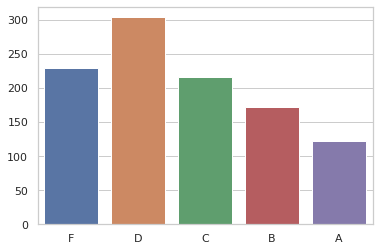

In [15]:
counts = df["G3Binned"].value_counts()
sns.barplot(counts.index, counts.values)

Observations:
- Binning has resolved some data imbalance.
- Resampling can be used to further combat data balance.

# Commit Data
Commit merged dataframe to disk

In [16]:
df = df.reset_index()
df.drop(columns=["index"])
os.makedirs("build", exist_ok=True)
df.to_feather(os.path.join("build", "dataset.feather"))